In [1]:
import pandas as pd

from src.utils.settings import Model_Settings
from src.models import neural_network as nn
from src.models import crossvalidation as cs
from src.utils import evaluation_utils as eu

%load_ext autoreload
%autoreload 2

In [2]:
training_columns = [
    'death', 'love', 'tragedy', 'violence', 'betrayal', 'friendship', 'happiness', 'fear', 'revenge', 'justice', 'hope', 'family', 
    'fate', 'greed', 'survival', 'transformation', 'Male actor count', 'Female actor count', 'N/A actor count', 'Character Count', 
    'Actors 0-20', 'Actors 20-30', 'Actors 30-40', 'Actors 40-60', 'Actors 60+', 'Character Count', 'revenue', 'runtime', 'release_year', 
    'vote_average', 'vote_count', 'adult', 'budget', 'popularity', 'sentiment'
]
target_column = "genre_hot"
MOVIES = pd.read_csv("cleaned_data.csv")
NEW_GENRE = pd.read_csv(r"src\utils\categories.csv")

model_settings = Model_Settings()

X_train, y_train, X_test, y_test, train_full, test_full = cs.train_and_test_split(
    MOVIES, 
    training_columns, target_column, 
    train_proportion =  model_settings.TEST_PROPORTION,
    seed = model_settings.SEED
)


file_params_name = 'optimized_params.pkl'
file_feature_name = 'optimized_features.pkl'
params_trees, params_forest, params_knn, params_rr = eu.load_params_from_file(file_params_name)
feature_trees, feature_forest, feature_knn, feature_rr = eu.load_params_from_file(file_params_name)


Epoch = 0
 - Loss = 5.501113414764404
 - Loss = 1.4216861724853516
 - Loss = 0.9785392880439758
 · accuracy = 0.8974
 · f_score = 0.2778
 · precision = 0.6667
 · recall = 0.1778
 · Validation loss (5804 samples): 3.3929
Epoch = 1
 - Loss = 0.6983151435852051
 - Loss = 1.4208868741989136
 - Loss = 0.23561535775661469
 · accuracy = 0.8889
 · f_score = 0.0000
 · precision = 0.0000
 · recall = 0.0000
 · Validation loss (5804 samples): 0.2621
Epoch = 2
 - Loss = 0.2140885889530182
 - Loss = 0.16365905106067657
 - Loss = 0.2323455661535263
 · accuracy = 0.8889
 · f_score = 0.0000
 · precision = 0.0000
 · recall = 0.0000
 · Validation loss (5804 samples): 0.2134
Epoch = 3
 - Loss = 0.20534920692443848
 - Loss = 0.15573154389858246
 - Loss = 0.22405870258808136
 · accuracy = 0.8974
 · f_score = 0.2778
 · precision = 0.6667
 · recall = 0.1778
 · Validation loss (5804 samples): 0.2026
Epoch = 4
 - Loss = 0.19502876698970795
 - Loss = 0.15666566789150238
 - Loss = 0.2258085310459137
 · accuracy =

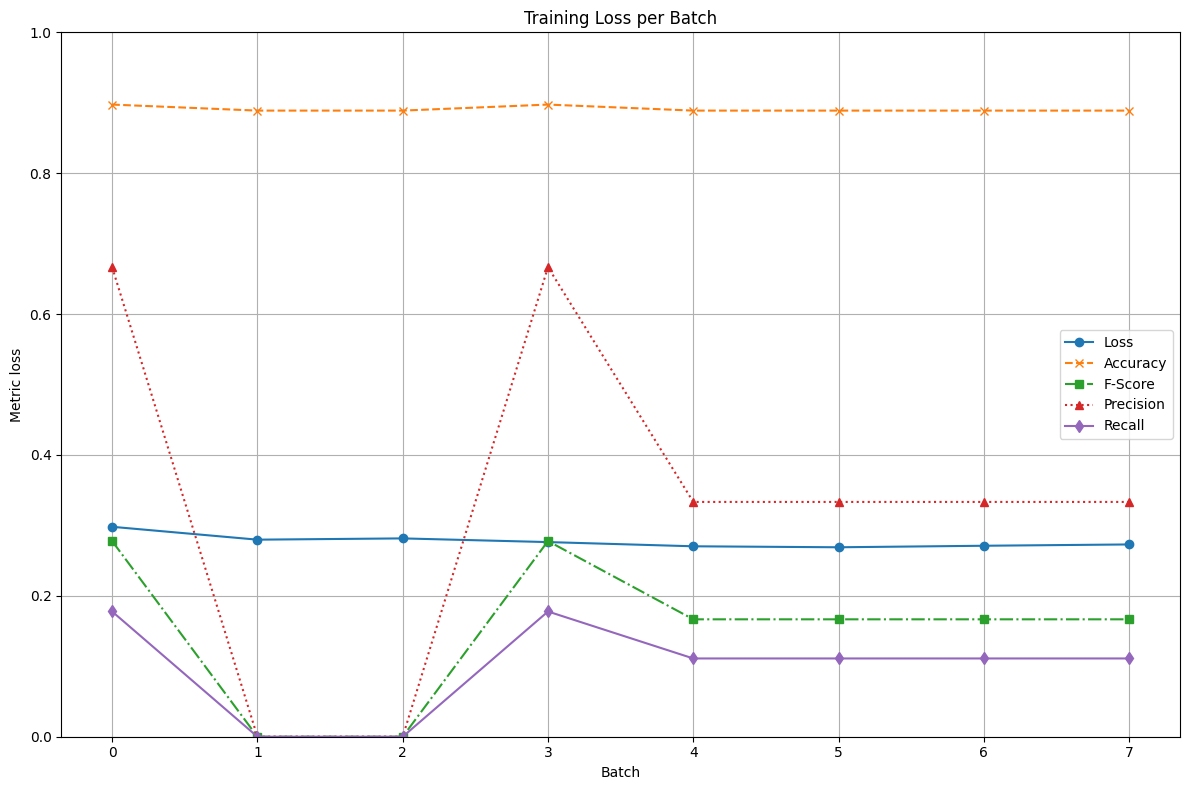

In [16]:
model_settings = Model_Settings(DENSE_SHAPE=True)

trained_model, histories, model_name = nn.start_train_model(training_columns, X_train, y_train, X_test, y_test, model_settings, print_result=True)
nn.save_model(trained_model, model_name)

In [ ]:
model_loaded = nn.load_model(model_name)
scores = nn.test_model_get_score(model_loaded, model_name, training_columns, X_test, y_test, test_full)

c:\Users\mique\OneDrive - UPV\.Importantes\.Uni\Cursos\4rt\ADA\Proyect\ada-2024-project-alpacadreamagency\data_analysis\src\models\neural_network.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

Testing model...
Testing total_accurazy = 36.2574
Testing total_f_score = 0.2910
Testing total_precision = 0.5025
Testing total_recall = 0.2306
len(predictions) = 5804
Preparing output...
len(testing_set["wikipedia_movie_ID"]) = 5804
len(testing_set["name"]) = 5804
len(testing_set["new_genres"]) = 5804
len(predicted_genre) = 5804
DONE!


In [ ]:
for shape in [True, False]:
    model_settings = Model_Settings(DENSE_SHAPE=shape)
    trained_model = nn.start_train_model(training_columns, X_train, y_train, X_test, y_test, model_settings)
    scores = nn.test_model_get_score(trained_model, training_columns, X_test, y_test)
    ref_fscore = scores[1][0]
    
    exclude_features = []
    for feature in training_columns:
        train_drop_columns = list(training_columns)
        train_drop_columns = train_drop_columns.remove(feature)
        trained_model = nn.start_train_model(train_drop_columns, X_train, y_train, X_test, y_test, model_settings)
        scores = nn.test_model_get_score(trained_model, train_drop_columns, X_test, y_test)
        fscore = scores[1][0]
        if fscore >= ref_fscore:
            exclude_features += [feature]
        print(f"   - Fscore = {fscore: .4f} Excluding: {feature}.")
        
    print(f"For {shape = }, exclude: {exclude_features}")

In [ ]:
file_feature_name = "TEST_AAA"
eu.save_params_to_file(
        file_feature_name, 
        features_trees=["AAA", "features_trees"], 
        features_forest=["AAA", "features_forest"], 
        features_knn=["AAA", "features_knn"], 
        features_rr=["AAA", "features_rr"]
    )
    
print(*eu.load_features_from_file(file_feature_name))

['AAA', 'features_trees'] ['AAA', 'features_forest'] ['AAA', 'features_knn'] ['AAA', 'features_rr']


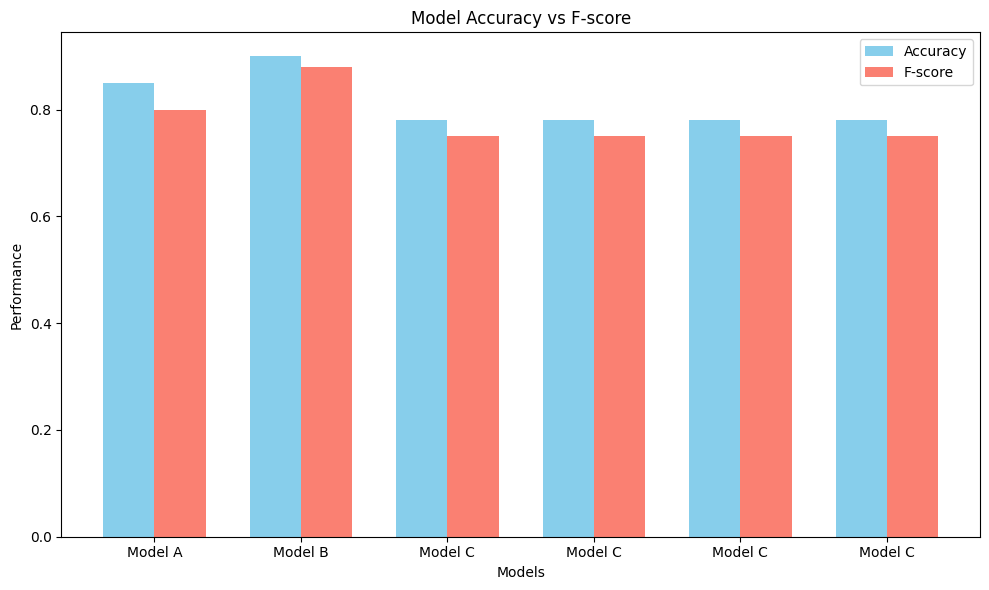

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual model data)
models_accurazy = [("Model A", 0.85), ("Model B", 0.90), ("Model C", 0.78), ("Model C", 0.78), ("Model C", 0.78), ("Model C", 0.78)]
models_fscore = [("Model A", 0.80), ("Model B", 0.88), ("Model C", 0.75), ("Model C", 0.75), ("Model C", 0.75), ("Model C", 0.75)]

model_names_accurazy, accuracies = zip(*models_accurazy)
model_names_fscore, f_scores = zip(*models_fscore)

n_models = len(model_names_accurazy)
width = 0.35
ind = np.arange(n_models)

plt.figure(figsize=(10, 6))

plt.bar(ind - width/2, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(ind + width/2, f_scores, width, label='F-score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Model Accuracy vs F-score')
plt.xticks(ind, model_names_accurazy)  # Set model names on the x-axis
plt.legend()

plt.tight_layout()